# Pytorch Basic Tutorials



In [ ]:
import torch
import torch.nn as nn
import numpy as np


In [ ]:
# ================================================================== #
#                         Table of Contents                          #
# ================================================================== #

# 1. Basic autograd example 1               (Line 25 to 39)
# 2. Basic autograd example 2               (Line 46 to 83)
# 3. Loading data from numpy                (Line 90 to 97)
# 4. Input pipline                          (Line 104 to 129)
# 5. Input pipline for custom dataset       (Line 136 to 156)
# 6. Pretrained model                       (Line 163 to 176)
# 7. Save and load model                    (Line 183 to 189)


In [ ]:
# ================================================================== #
#                     1. Basic autograd example 1                    #
# ================================================================== #

# 텐서 만들기

# x = torch.tensor(1, requires_grad=True)
# -> floating point 텐서만 가능하다. 복잡한 데이터 타입은 기울기들이 필요하다.

x = torch.tensor(1., requires_grad=True) # 0차원 텐서이다. 하나의 값만 포함하고 있는 0차원 텐서이다.
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)


# computational graph 만들기
y = w * x + b

# 기울기를 계산
y.backward()

# 기울기를 프린트
print(x.grad) # (dy/dx = w) -> y를 x에 대하여 미분
print(w.grad) # (dy/dw = x) -> y를 w에 대하여 미분
print(b.grad) # (dy/db = 1) -> y를 b에 대하여 미분

tensor(2.)
tensor(1.)
tensor(1.)


In [ ]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10,3)
y = torch.randn(10,2)



### Fully Connected Layers 완전 연결 계층

- 완전 연결되어 있다는 뜻으로, 한 층(layer)의 모든 뉴런이 다음 층(layer)의 모든 뉴런과 연결된 상태를 말한다.

- 1차원 배열의 형태로 평탄화된 행렬을 통해 이미지를 분류하는데 사용되는 계층이다.

- nn.Linear(3,2)는 가중치(w)와 편향(b)을 생성하고 y= Wx + b라는 수식을 정의해둔다.

- 실제로 계산이 이루어지지는 않는다.

In [ ]:
# Build a fully connected layer.
linear = nn.Linear(3,2) # 입력 3개 -> 출력 2개로 변환하는 fully connected layer이다.
print('w: ', linear.weight)
print('b: ', linear.bias)


w:  Parameter containing:
tensor([[ 0.1149, -0.5433, -0.2252],
        [-0.2473,  0.5717,  0.5135]], requires_grad=True)
b:  Parameter containing:
tensor([-0.1315,  0.4022], requires_grad=True)


### Loss function and Optimizer 손실 함수와 옵티마이저







---


(Reminding)            
- **loss function**은 네트워크에서 내놓은 결과 값과 실제 값 사이의 차이를 정의하는 값을 최소화하기 위해 기울기를 이용한다. 보통 경사하강법(Gradient Descent)을 사용한다.

- **경사하강법**에서는 손실함수의 값을 최소화하는 파라미터 값을 찾는 것으로 기울기의 반대 방향으로 일정 크기 만큼 이동하는 것을 반복한다.


---

### Stochastic Gradient Descent (SGD)



- 손실 함수의 값을 계산할 때, 전체 Train-Set을 사용하는 것을 Batch Gradient Descent라고 한다.

- 그러나 전체 데이터셋에 대해서 loss function을 계산해야 하므로 너무 많은 계산 양을 필요로 한다.

- 그래서 **" 전체 데이터셋(Batch) 대신 일부 데이터의 모음(Mini-batch)를 사용 "** 하여 손실 함수를 계산한다.

- 계산 속도가 훨씬 빠르기 때문에 같은 시간에 더 많은 step을 갈 수 잇으며, 여러 번 반복할 경우 Batch 처리한 결과로 수렴한다.

### Mean Squared Error 평균제곱오차

- 예측값과 실제값의 차이를 제곱하여 평균한 값이다.

In [ ]:
# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(),lr = 0.01)


### Forward 순전파

**입력을 받아서 출력값을 계산하는 과정**을 말한다.

In [ ]:
# Forward pass.

pred = linear(x)

# Compute loss.
loss = criterion(pred,y) # 손실 함수 값을 계산
print('loss: ', loss.item())

loss:  1.0487306118011475


In [ ]:
# Backward pass.
loss.backward() # 기울기를 계산


# Print out the gradients.
print ('dL/dw: ', linear.weight.grad)
print ('dL/db: ', linear.bias.grad)


# 1-step gradient descent.
optimizer.step()


# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred,y)
print('loss after 1 step optimization: ', loss.item())

dL/dw:  tensor([[ 0.0708,  0.1763, -0.9725],
        [-0.4254,  0.6189,  1.5873]])
dL/db:  tensor([0.3652, 1.7141])
loss after 1 step optimization:  1.0255229473114014


### numpy를 데이터로 변환하기



In [ ]:
# ================================================================== #
#                     3. Loading data from numpy                     #
# ================================================================== #

# Create a numpy array.
x = np.array([[1,2],[3,4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

### Input Pipeline 입력 파이프라인





- 데이터를 모델에 효율적으로 공급하는 과정이다.

- 데이터를 불러오고 -> 전처리 -> 배치(batch)로 만들어 모델에 전달하는 과정을 의미한다.

### Input Pipeline이 왜 필요할까 ?




- 딥러닝 모델을 학습할 대 데이터가 너무 크거나 복잡하면 직접 메모리에 올릴 수가 없다.

- 그래서 데이터를 작은 배치(batch) 단위로 불러와 처리하는 것이다.

In [ ]:
import torchvision
import torchvision.transforms as transforms

# ================================================================== #
#                         4. Input pipeline                           #
# ================================================================== #

# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)



100%|██████████| 170M/170M [00:03<00:00, 49.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data/


In [ ]:

# read data from disk.
image, label = train_dataset[0]
print(image)
print(image.size())
print(label)

# 데이터가 어떻게 이뤄져 있는지 확인
print(train_dataset[10][1])

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

### 이미지 확인하기

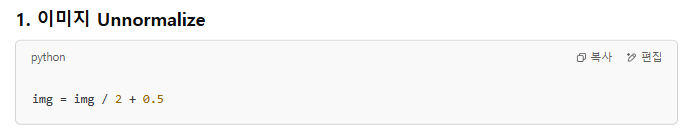

  - Pytorch에서는 torchvision.transforms.Normalize(mean, std)로 정규화를 수행하는 경우가 많다

  - 예를 들어,


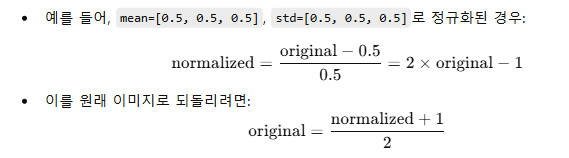

- 원래 이미지로 되돌려준 후,

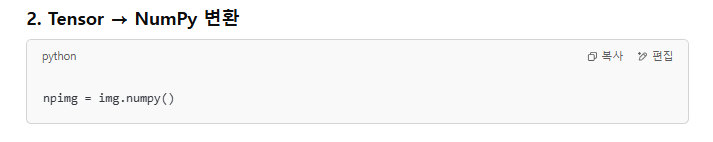

- PyTorch의 torch.Tensor는 GPU에서 연산이 가능하고, 자동 미분 기능을 지원한다.

- NumPy의 ndarray는 CPU에서 동작하며, 일반적인 수치 연산을 수행한다.

- Matplotlib의 imshow()는 NumPy의 **ndarray 형식의 데이터를 요구**하기 때문에 변환줘야 한다.

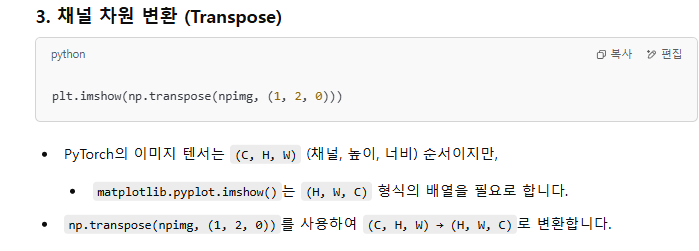

- transpose는 축(axis)의 순서를 변경하는 함수이다.

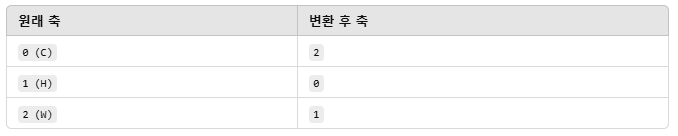

(1,2,0)인 이유는,

- 첫번째 H가 들어와야 하니까 1
- 두번째 W가 들어와야 하니까 2
- 세번째 C가 들어와야 하니까 0



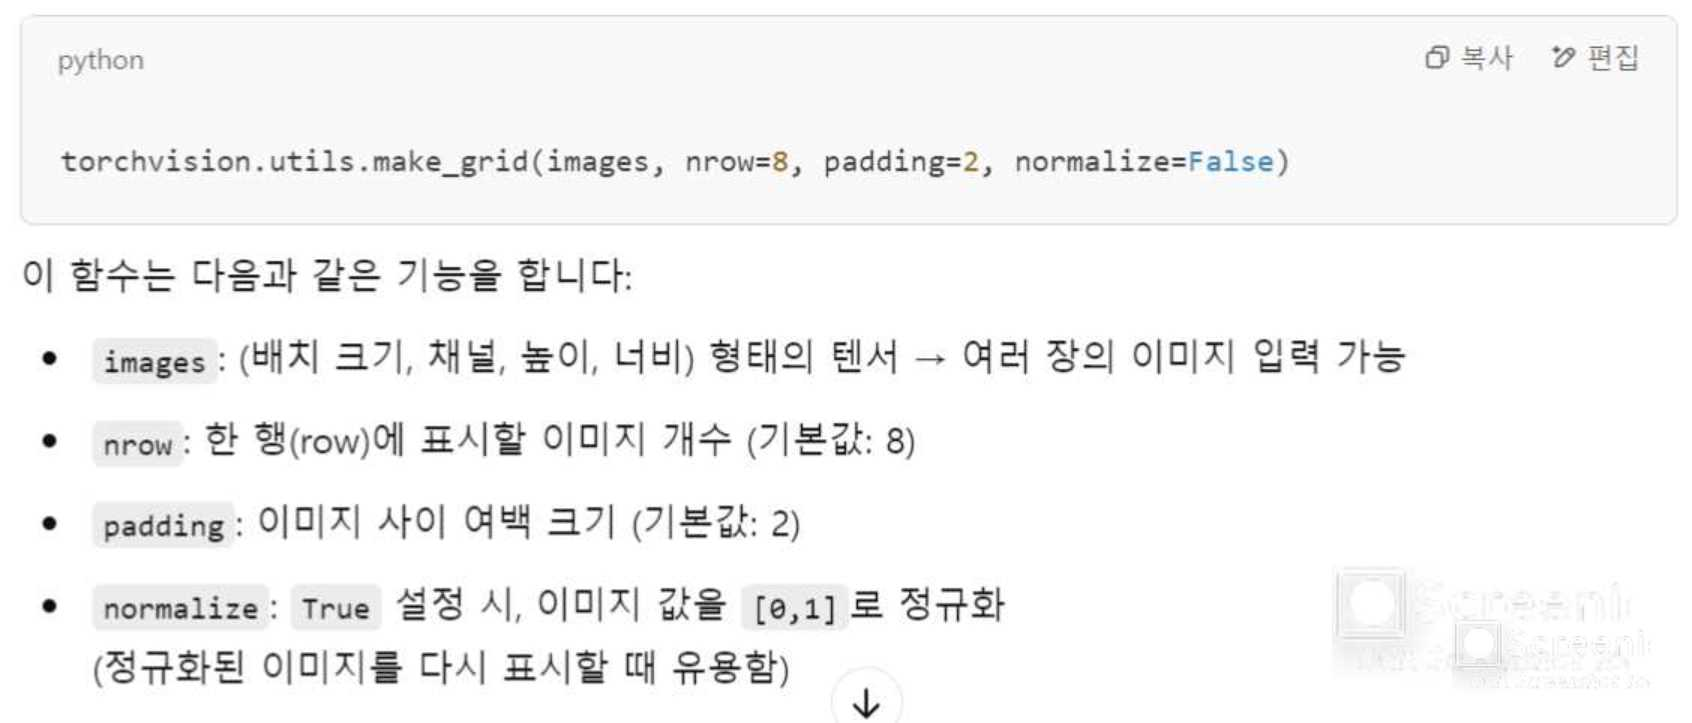

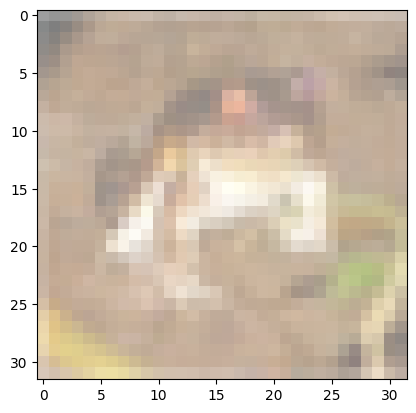

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 하나의 이미지 보여주기
imshow(torchvision.utils.make_grid(image))



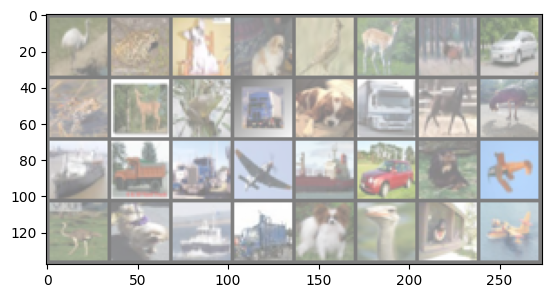

In [ ]:
# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 32, shuffle = True)

# Data loader를 변환 -> 한번에 하나의 배치를 가져올 수 있다.
data_iter = iter(train_loader)

# 첫 번째 배치 가져오기
images, labels = next(data_iter)

# 미니 배치 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.

    # 1. 기울기 초기화
    # 2. 순전파
    # 3. 손실 계산
    # 4. 역전파
    # 5. 가중치 업데이트
    pass


In [5]:
# ================================================================== #
#                5. Input pipeline for custom dataset                 #
# ================================================================== #

import torch
import torchvision
import numpy as np
from torch.utils.data import Dataset
from PIL import Image

# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, train = True, transform = None):
        # TODO
        # 1. Initialize file paths or a list of file names.
        self.dataset = torchvision.datasets.CIFAR10(root='./data',train = train, download=True)
        self.images = self.dataset.data
        self.labels = np.array(self.dataset.targets) # labels는 파이썬 리스트 형태로 되어 있기 때문에
        self.transform = transform

    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        image = Image.fromarray(self.images[index])
        label = self.labels[index]

        # 2. Preprocess the data (e.g. torchvision.Transform).
        image = self.transform(image)

        # 3. Return a data pair (e.g. image and label).
        return image, label

    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return len(self.images)

# You can then use the prebuilt data loader.
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64,
                                           shuffle=True)

Files already downloaded and verified


### torchvision

Pytorch에서 이미지 관련 작업을 쉽게 할 수 있도록 지원하는 라이브러리이다.

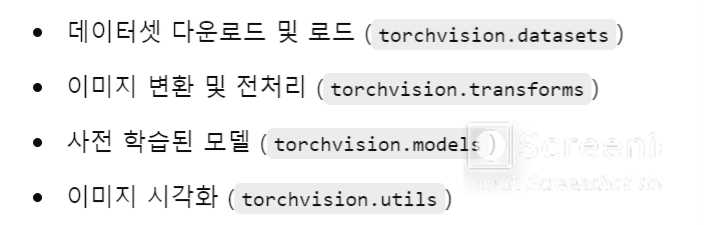

In [ ]:
# ================================================================== #
#                        6. Pretrained model                         #
# ================================================================== #

# 사전 학습된 ResNet-18 모델 다운로드
resnet = torchvision.models.resnet18(pretrained=True)

# 기존 모델의 모든 가중치를 고정 ()
for param in resnet.parameters():
    param.requires_grad = False # 기존 레이어의 학습을 막음

# 마지막 fc 레이터를 새로운 출력 차원으로 변경 (100개의 클래스로 분류하도록)
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 기존 입력 특징 수를 유지한 채, 새로운 100개 클래스로 분류

# Forward pass.
images = torch.randn(64, 3, 224, 224) # 64개 배치, 3채널, 224 X 224 이미지
outputs = resnet(images)
print (outputs.size())     # (64, 100)

# ================================================================== #
#                      7. Save and load the model                    #
# ================================================================== #

# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

[출처]
https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py

https://chatgpt.com/c/67bbda11-f334-8009-839a-cd3ccf069e0b